# **7장.  행동으로 배우는 인공지능 — 강화학습 입문**

## **7-1 강화학습과 Q-러닝의 기초**

📌[실습 07-01] 라이브러리 불러오기

In [ ]:
!pip install koreanize_matplotlib # 한글 그래프 폰트 설치
import koreanize_matplotlib
import numpy as np; import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 78.8 MB/s eta 0:00:00


📌 [실습 07-02] 환경 설정하기

In [ ]:
n_actions=3             # 조업 포인트 0,1,2
actions=[0, 1, 2]       # 행동 인덱스
max_catch=np.array([30, 50, 20])  # 각 포인트의 최대 어획량, 사전적으로 모르고 경험을 통해 찾아야 함
print("포인트별 평균 어획량:", max_catch/2)
print("최고의 조업 포인트=", np.argmax(max_catch))

포인트별 평균 어획량: [15. 25. 10.]
최고의 조업 포인트= 1


📌 [실습 07-03] 무작위로 Q값 설정하기

In [ ]:
Q=np.random.rand(1, n_actions)
print("Q의 차원=", Q.shape)
print("현재의 포인트별 Q값=", Q); print()
print("Q에 따른 최적 행동은 ==> ", actions[np.argmax(Q)])

Q의 차원= (1, 3)
현재의 포인트별 Q값= [[0.07913777 0.71680837 0.99001092]]

Q에 따른 최적 행동은 ==>  2


📌 [실습 07-04] 무작위로 Q값 설정하기

In [ ]:
np.random.seed(42)  # 랜덤 시드 고정
n_episodes=10   # 학습 횟수 설정

# 초깃값 설정
Q=np.zeros(n_actions)
실행_횟수=np.zeros(n_actions)    # 포인트별 조업 횟수를 기록
누적_보상=np.zeros(n_actions)    # 포인트별 누적 보상(어획량) 기록

# 에피소드별 경험과 학습
for ep in range(n_episodes):
    action=np.argmax(Q)
    reward=np.random.randint(0, max_catch[action]+1) # 균일 분포에서 실현된 어획량
    누적_보상[action]=누적_보상[action] + reward
    실행_횟수[action]=실행_횟수[action] + 1

    # Q 업데이트 (현재까지 경험으로 계산된 평균 보상)
    Q[action]=누적_보상 [action]/실행_횟수[action]

    Q_str=" ".join([f"{q:.3f}" for q in Q])  # f스트링 출력을 위해 문자열로 변환
    print(f"에피소드={ep}, 행동= {action}, 보상={reward:2} -> Q_배열=[{Q_str}]")


에피소드=0, 행동= 0, 보상= 6 -> Q_배열=[6.000 0.000 0.000]
에피소드=1, 행동= 0, 보상=19 -> Q_배열=[12.500 0.000 0.000]
에피소드=2, 행동= 0, 보상=28 -> Q_배열=[17.667 0.000 0.000]
에피소드=3, 행동= 0, 보상=14 -> Q_배열=[16.750 0.000 0.000]
에피소드=4, 행동= 0, 보상=10 -> Q_배열=[15.400 0.000 0.000]
에피소드=5, 행동= 0, 보상= 7 -> Q_배열=[14.000 0.000 0.000]
에피소드=6, 행동= 0, 보상=28 -> Q_배열=[16.000 0.000 0.000]
에피소드=7, 행동= 0, 보상=20 -> Q_배열=[16.500 0.000 0.000]
에피소드=8, 행동= 0, 보상= 6 -> Q_배열=[15.333 0.000 0.000]
에피소드=9, 행동= 0, 보상=25 -> Q_배열=[16.300 0.000 0.000]


📌[실습 07-05] e-그리디 정책 반영하기

In [ ]:
np.random.seed(42)  # 랜덤 시드 고정

# 초깃값 설정
Q=np.zeros(n_actions)
실행_횟수=np.zeros(n_actions)    # 포인트별 조업 횟수를 기록
누적_보상=np.zeros(n_actions)    # 포인트별 누적 보상(어획량) 기록

e=0.5          # 탐험 비율 설정

for ep in range(n_episodes):
    if np.random.rand() < e:
      action=np.random.randint(n_actions)   # 무작위 탐험
    else:
      action=np.argmax(Q)                   # Q값 기반 활용

    reward=np.random.randint(0, max_catch[action]+1) # 균일 분포에서 실현된 어획량
    누적_보상[action]=누적_보상 [action] + reward
    실행_횟수[action]=실행_횟수[action] + 1
    # Q 업데이트 (현재까지 경험으로 계산된 평균 보상)
    Q[action]=누적_보상 [action]/실행_횟수[action]

    Q_str=" ".join([f"{q:.3f}" for q in Q])  # f스트링 출력을 위해 배열을 문자열로
    print(f"에피소드={ep}, 엡실론={e: .3f}, 행동= {action}, 보상={reward:2} -> Q값=[{Q_str:10}]")

에피소드=0, 엡실론= 0.500, 행동= 0, 보상=14 -> Q값=[14.000 0.000 0.000]
에피소드=1, 엡실론= 0.500, 행동= 0, 보상=28 -> Q값=[21.000 0.000 0.000]
에피소드=2, 엡실론= 0.500, 행동= 0, 보상=25 -> Q값=[22.333 0.000 0.000]
에피소드=3, 엡실론= 0.500, 행동= 2, 보상=10 -> Q값=[22.333 0.000 10.000]
에피소드=4, 엡실론= 0.500, 행동= 0, 보상= 3 -> Q값=[17.500 0.000 10.000]
에피소드=5, 엡실론= 0.500, 행동= 2, 보상=20 -> Q값=[17.500 0.000 15.000]
에피소드=6, 엡실론= 0.500, 행동= 0, 보상=11 -> Q값=[16.200 0.000 15.000]
에피소드=7, 엡실론= 0.500, 행동= 0, 보상= 1 -> Q값=[13.667 0.000 15.000]
에피소드=8, 엡실론= 0.500, 행동= 0, 보상= 0 -> Q값=[11.714 0.000 15.000]
에피소드=9, 엡실론= 0.500, 행동= 1, 보상=43 -> Q값=[11.714 43.000 15.000]


📌[실습 07-06] 에피소드 횟수에 따른 탐험 비율 줄이기

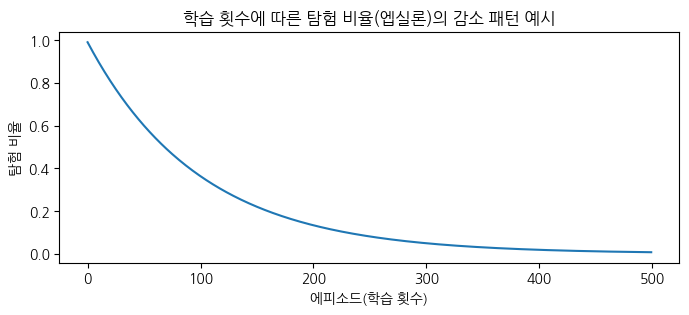

In [ ]:
plt.figure(figsize=(8, 3))
n_episodes=500
e=1.0  #           # 초기 탐험 비율
e_decay=0.99      # 일정 비율로 탐험 비율 감소
e_save=[]          # 그래프용 e값 저장 리스트
for i in range(n_episodes):
      e=e*e_decay
      e_save.append(e)
plt.plot(e_save)
plt.title("학습 횟수에 따른 탐험 비율(엡실론)의 감소 패턴 예시")
plt.xlabel("에피소드(학습 횟수)"); plt.ylabel("탐험 비율")
plt.show()

📌[실습 07-07] 탐험 비율 감소를 포함한 Q-러닝 적용하기

In [ ]:
np.random.seed(42)  # 랜덤 시드 고정

# 환경 설정
n_actions=3
actions=[0, 1, 2]
max_catch=np.array([30, 50, 20])

# 하이퍼 파라미터 설정
n_episodes=500  # 학습 횟수 설정
e=1.0; e_decay=0.99 # 탐험 비율 설정

# 초기값 설정
Q = np.zeros(n_actions)
실행_횟수=np.zeros(n_actions)
누적_보상=np.zeros(n_actions)

# 그래프용으로 기록
Q_history=[]

for ep in range(n_episodes):
    if np.random.rand() < e:
      action=np.random.randint(n_actions)   # 무작위 탐험
    else:
      action=np.argmax(Q)                   # Q값 기반 활용

    reward = np.random.randint(0, max_catch[action]+1) # 균일 분포에서 어획량 실현
    누적_보상[action]=누적_보상[action]+reward
    실행_횟수[action]=실행_횟수[action]+1

    # Q값 업데이트 (현재까지 경험으로 계산된 평균 보상)
    Q[action]=누적_보상[action]/실행_횟수[action]

    Q_str=" ".join([f"{q:.3f}" for q in Q])  # f스트링 출력을 위해 배열을 문자열로
    print(f"에피소드={ep}, 엡실론={e: .3f}, 행동= {action}, 보상={reward:2} -> Q값=[{Q_str}]")
    e=e*e_decay                # 탐험 비율을 점차 감소시킴
    Q_history.append(Q.copy()) # Q-배열 기록

에피소드=0, 엡실론= 1.000, 행동= 0, 보상=14 -> Q값=[14.000 0.000 0.000]
에피소드=1, 엡실론= 0.990, 행동= 0, 보상=20 -> Q값=[17.000 0.000 0.000]
에피소드=2, 엡실론= 0.980, 행동= 2, 보상=10 -> Q값=[17.000 0.000 10.000]
에피소드=3, 엡실론= 0.970, 행동= 0, 보상= 3 -> Q값=[12.333 0.000 10.000]
에피소드=4, 엡실론= 0.961, 행동= 2, 보상=20 -> Q값=[12.333 0.000 15.000]
에피소드=5, 엡실론= 0.951, 행동= 2, 보상=11 -> Q값=[12.333 0.000 13.667]
에피소드=6, 엡실론= 0.941, 행동= 1, 보상=20 -> Q값=[12.333 20.000 13.667]
에피소드=7, 엡실론= 0.932, 행동= 1, 보상=21 -> Q값=[12.333 20.500 13.667]
에피소드=8, 엡실론= 0.923, 행동= 0, 보상=16 -> Q값=[13.250 20.500 13.667]
에피소드=9, 엡실론= 0.914, 행동= 2, 보상= 9 -> Q값=[13.250 20.500 12.500]
에피소드=10, 엡실론= 0.904, 행동= 2, 보상=14 -> Q값=[13.250 20.500 12.800]
에피소드=11, 엡실론= 0.895, 행동= 2, 보상=19 -> Q값=[13.250 20.500 13.833]
에피소드=12, 엡실론= 0.886, 행동= 2, 보상= 4 -> Q값=[13.250 20.500 12.429]
에피소드=13, 엡실론= 0.878, 행동= 0, 보상= 8 -> Q값=[12.200 20.500 12.429]
에피소드=14, 엡실론= 0.869, 행동= 0, 보상=27 -> Q값=[14.667 20.500 12.429]
에피소드=15, 엡실론= 0.860, 행동= 1, 보상= 8 -> Q값=[14.667 16.333 12.429]
에피소드=16, 엡

📌[실습 07-08] Q값의 변화를 선 그래프로 시각화하기

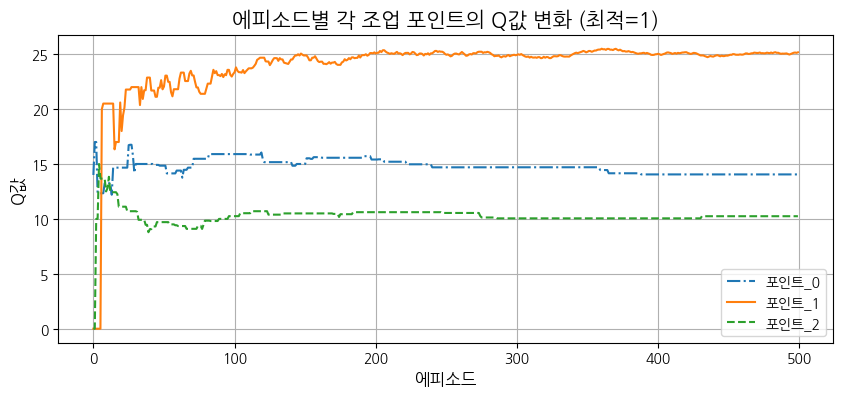

In [ ]:
plt.figure(figsize=(10, 4))
Q_history=np.array(Q_history)
# Q값 변화 그래프
line=["-.", "-", "--" ]  # 행동별 선 종류 지정

for i in range(3):
    plt.plot(Q_history[:, i], linestyle=line[i], label=f'포인트_{i}')
plt.xlabel('에피소드', fontsize=12)
plt.ylabel('Q값', fontsize=12)
plt.title(f'에피소드별 각 조업 포인트의 Q값 변화 (최적={np.argmax(Q)})', fontsize=15)
plt.legend()
plt.grid()
plt.show()
